In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

import seaborn as sns

In [2]:
cols = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
       'Weight', 'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(r'C:\Users\Administrateur\Downloads\auto-mpg.data',
                names=cols, na_values = "?", comment = '\t', 
                sep= " ",
                skipinitialspace=True)



In [3]:
data = df.copy()

In [4]:
df.sample(11)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
21,24.0,4,107.0,90.0,2430.0,14.5,70,2
86,14.0,8,304.0,150.0,3672.0,11.5,73,1
43,13.0,8,400.0,170.0,4746.0,12.0,71,1
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
318,29.8,4,134.0,90.0,2711.0,15.5,80,3
379,36.0,4,98.0,70.0,2125.0,17.3,82,1
276,21.6,4,121.0,115.0,2795.0,15.7,78,2
124,11.0,8,350.0,180.0,3664.0,11.0,73,1
321,32.2,4,108.0,75.0,2265.0,15.2,80,3
393,27.0,4,140.0,86.0,2790.0,15.6,82,1


In [5]:
#MPG TARGET VARIABLE

In [6]:
# CHECKING THE DATA INFO

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 24.9 KB


In [7]:
# CHECKING FOR ALL THE NULL VALUES

data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
# summary stat of quantitatives variables

data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<AxesSubplot:xlabel='Horsepower'>

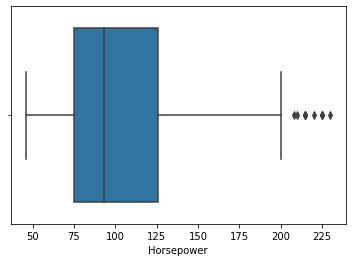

In [9]:
sns.boxplot(x=data['Horsepower'])

In [10]:
# imputing the values with the median

median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)

In [11]:
# category distribution

data['Cylinders'].value_counts() 

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64

In [12]:
data['Cylinders'].value_counts()  / len(data) # idem in  %

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [13]:
data['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

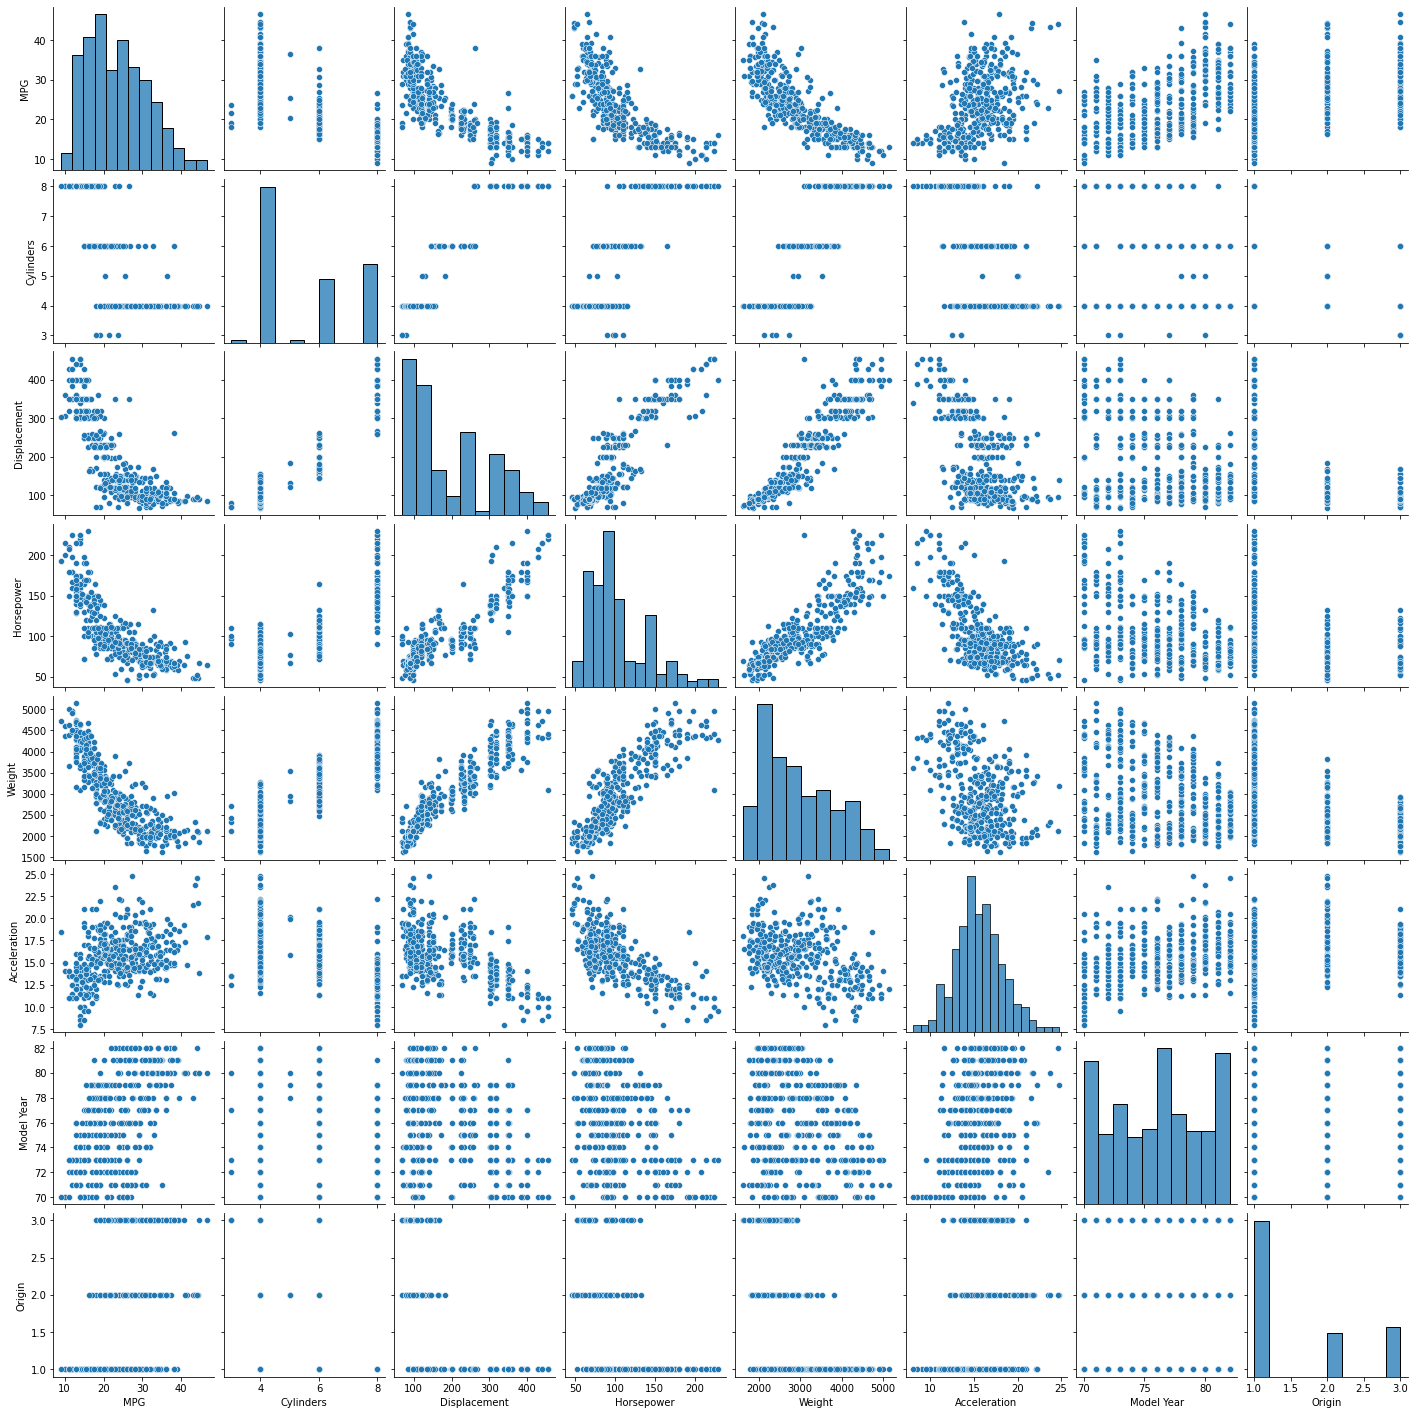

In [14]:
# pairplots to get intuition of potential corr

sns.pairplot(data[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']])

 data preparation with sklearn and pandas

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings('ignore')

In [16]:
cols = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
       'Weight', 'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(r'C:\Users\Administrateur\Downloads\auto-mpg.data',
                names=cols, na_values = "?", comment = '\t', 
                sep= " ",
                skipinitialspace=True)

data = df.copy()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['Cylinders']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

Segregating Target and Features variables

In [17]:
data = strat_train_set.drop('MPG', axis=1)
data_labels = strat_train_set['MPG'].copy()

Preprocessing the origin column

In [18]:
def preprocess_origin_cols(df):
    df['Origin']= df['Origin'].map({1: 'India', 2: 'USA', 3: 'Germany'})
    return df
data_tr = preprocess_origin_cols(data)
data_tr.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,Germany
151,4,79.0,67.0,2000.0,16.0,74,USA
388,4,156.0,92.0,2585.0,14.5,82,India
48,6,250.0,88.0,3139.0,14.5,71,India
114,4,98.0,90.0,2265.0,15.5,73,USA


One Hot Encoding the Origin column

In [19]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    314 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
 6   Origin        318 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 18.6+ KB


In [20]:
# isolating the origin column

data_cat = data_tr[['Origin']]
data_cat.head()

,Origin
145,Germany
151,USA
388,India
48,India
114,USA


In [21]:
# One Hot Encoding the categorical values
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot # return a sparse matrix

<318x3 sparse matrix of type '<class 'numpy.float64'>'
	with 318 stored elements in Compressed Sparse Row format>

In [22]:
data_cat_1hot.toarray()[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [23]:
cat_encoder.categories_

[array(['Germany', 'India', 'USA'], dtype=object)]

Handling Missing values using SimpleImputer

In [24]:
num_data = data.iloc[:, :-1]
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    314 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 17.4 KB


In [25]:
# handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(num_data)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [26]:
# median of all the columns from imputer
imputer.statistics_

array([   4. ,  146. ,   92. , 2844. ,   15.5,   76. ])

In [27]:
# median pandas
data.median().values

array([   4. ,  146. ,   92. , 2844. ,   15.5,   76. ])

In [28]:
# imputing the missing values by transforming the dataframe
X = imputer.transform(num_data)
X

array([[   4. ,   83. ,   61. , 2003. ,   19. ,   74. ],
       [   4. ,   79. ,   67. , 2000. ,   16. ,   74. ],
       [   4. ,  156. ,   92. , 2585. ,   14.5,   82. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6,   82. ],
       [   4. ,  113. ,   95. , 2372. ,   15. ,   70. ],
       [   6. ,  146. ,  120. , 2930. ,   13.8,   81. ]])

In [29]:
# converting the 2D array back into a dataframe
data_tr = pd.DataFrame(X, columns=num_data.columns,
                      index=num_data.index)
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    float64
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    float64
dtypes: float64(6)
memory usage: 17.4 KB


In [30]:
# Adding Attributes using BaseEstimator and Transformer

num_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
145,4,83.0,61.0,2003.0,19.0,74
151,4,79.0,67.0,2000.0,16.0,74
388,4,156.0,92.0,2585.0,14.5,82
48,6,250.0,88.0,3139.0,14.5,71
114,4,98.0,90.0,2265.0,15.5,73


In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

acc_ix, hpower_ix, cyl_ix = 4, 2, 0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True): # no *args or **kargs
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix]
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl]
        return np.c_[X, acc_on_cyl]
    
attr_adder = CustomAttrAdder(acc_on_power=True)
data_tr_extra_attrs = attr_adder.transform(data_tr.values)
data_tr_extra_attrs[0]

array([4.0000000e+00, 8.3000000e+01, 6.1000000e+01, 2.0030000e+03,
       1.9000000e+01, 7.4000000e+01, 3.1147541e-01, 4.7500000e+00])

Creating a Pipeline of tasks

In [32]:
from sklearn.pipeline import Pipeline
##Using StandardScaler to scale all num attributes
from sklearn.preprocessing import StandardScaler

numerics = ['float64', 'int64']

num_data = data_tr.select_dtypes(include=numerics)

##pipeline for num attributes
##imputing --> adding attributes --> scale them
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attrs_adder', CustomAttrAdder()),
    ('std_scaler', StandardScaler()),
   ])
num_data_tr = num_pipeline.fit_transform(num_data)
num_data_tr[0]

array([-0.85657842, -1.07804475, -1.15192977, -1.17220298,  1.21586943,
       -0.54436373,  1.70952741,  1.29565517])

In [33]:
##transform differnt cols or subsets using ColumnTransformer
from sklearn.compose import ColumnTransformer

num_attrs = list(num_data)
cat_attrs = ['Origin']

##complete pipeline to transform
##both num and cat attributes
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attrs),
    ('cat', OneHotEncoder(), cat_attrs),
  ])

prepared_data = full_pipeline.fit_transform(data)
prepared_data

array([[-0.85657842, -1.07804475, -1.15192977, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85657842, -1.1174582 , -0.9900351 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.85657842, -0.3587492 , -0.31547399, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.85657842, -0.56566984, -0.53133355, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85657842, -0.78244384, -0.23452666, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.32260746, -0.45728283,  0.44003446, ...,  1.        ,
         0.        ,  0.        ]])